In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

Carga de datos

In [3]:
#Cargar dataframe y obtener primeros valores para conocimiento de datos
dataframe = pd.read_csv('train.csv', encoding='latin-1',engine='python')
print(dataframe.head())
data_test = pd.read_csv('test.csv', encoding='latin-1',engine='python')
print(data_test.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


Limpieza de datos

In [4]:
#Se convierten a minusculas los textos
for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = dataframe.loc[i,'text'].lower()

for i in range(len(data_test)):
    data_test.loc[i,'text'] = data_test.loc[i,'text'].lower()

In [5]:
print(dataframe.head())
print(data_test.head())

   id keyword location                                               text  \
0   1     NaN      NaN  our deeds are the reason of this #earthquake m...   
1   4     NaN      NaN             forest fire near la ronge sask. canada   
2   5     NaN      NaN  all residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  just got sent this photo from ruby #alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 just happened a terrible car crash
1   2     NaN      NaN  heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           apocalypse lighting. #spokane #wildfires
4  11     NaN      NaN      typhoon soudelor kills 28 in china and taiwan


In [6]:
#referencia> https://stackoverflow.com/questions/6718633/python-regular-expression-again-match-url
import re

print(dataframe['text'][31])
#Se eliminan las urls

for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', "", dataframe.loc[i,'text'])

for i in range(len(data_test)):
    data_test.loc[i,'text'] = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', data_test.loc[i,'text'])


print(dataframe['text'][31])
print(dataframe.head())
print(data_test.head())

@bbcmtd wholesale markets ablaze http://t.co/lhyxeohy6c
@bbcmtd wholesale markets ablaze 
   id keyword location                                               text  \
0   1     NaN      NaN  our deeds are the reason of this #earthquake m...   
1   4     NaN      NaN             forest fire near la ronge sask. canada   
2   5     NaN      NaN  all residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  just got sent this photo from ruby #alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 just happened a terrible car crash
1   2     NaN      NaN  heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           apocalypse lighting. #spokane #wildfires
4  11

In [7]:
from string import punctuation

#Se eliminan los signos de puntuacion
for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = ''.join(c for c in dataframe.loc[i,'text'] if c not in punctuation)

for i in range(len(data_test)):
    data_test.loc[i,'text'] = ''.join(c for c in data_test.loc[i,'text'] if c not in punctuation)

print(dataframe.head())
print(data_test.head())


   id keyword location                                               text  \
0   1     NaN      NaN  our deeds are the reason of this earthquake ma...   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  all residents asked to shelter in place are be...   
3   6     NaN      NaN  13000 people receive wildfires evacuation orde...   
4   7     NaN      NaN  just got sent this photo from ruby alaska as s...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 just happened a terrible car crash
1   2     NaN      NaN  heard about earthquake is different cities sta...
2   3     NaN      NaN  there is a forest fire at spot pond geese are ...
3   9     NaN      NaN              apocalypse lighting spokane wildfires
4  11     NaN      NaN      typhoon soudelor kills 28 in china and taiwan


In [8]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#Se eliminan las stopwords
stop_words = stopwords.words('english')

for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = ' '.join(word for word in dataframe.loc[i,'text'].split() if word not in stop_words)

for i in range(len(data_test)):
    data_test.loc[i,'text'] = ' '.join(word for word in data_test.loc[i,'text'].split() if word not in stop_words)

print(dataframe.head())
print(data_test.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALIEWARE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   id keyword location                                               text  \
0   1     NaN      NaN       deeds reason earthquake may allah forgive us   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  residents asked shelter place notified officer...   
3   6     NaN      NaN  13000 people receive wildfires evacuation orde...   
4   7     NaN      NaN  got sent photo ruby alaska smoke wildfires pou...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                        happened terrible car crash
1   2     NaN      NaN  heard earthquake different cities stay safe ev...
2   3     NaN      NaN  forest fire spot pond geese fleeing across str...
3   9     NaN      NaN              apocalypse lighting spokane wildfires
4  11     NaN      NaN             typhoon soudelor kills 28 china taiwan


In [9]:
#Se eliminan emojis
emoji_regex = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = emoji_regex.sub(r'', dataframe.loc[i,'text'])

for i in range(len(data_test)):
    data_test.loc[i,'text'] = emoji_regex.sub(r'', data_test.loc[i,'text'])

print(dataframe.head())
print(data_test.head())

   id keyword location                                               text  \
0   1     NaN      NaN       deeds reason earthquake may allah forgive us   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  residents asked shelter place notified officer...   
3   6     NaN      NaN  13000 people receive wildfires evacuation orde...   
4   7     NaN      NaN  got sent photo ruby alaska smoke wildfires pou...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                        happened terrible car crash
1   2     NaN      NaN  heard earthquake different cities stay safe ev...
2   3     NaN      NaN  forest fire spot pond geese fleeing across str...
3   9     NaN      NaN              apocalypse lighting spokane wildfires
4  11     NaN      NaN             typhoon soudelor kills 28 china taiwan


In [10]:
#Se eliminan numeros excepto 911
#Referencia : https://stackoverflow.com/questions/57174831/how-to-remove-digits-in-a-string-except-those-in-hashtags-using-regex
for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = re.sub(r'#\S+|\d+',
    lambda match: match.group(0) if match.group(0).startswith('911') else '', dataframe.loc[i,'text'])

for i in range(len(data_test)):
    data_test.loc[i,'text'] = re.sub(r'#\S+|\d+',
    lambda match: match.group(0) if match.group(0).startswith('911') else '', data_test.loc[i,'text'])

print(dataframe.head())
print(data_test.head())

   id keyword location                                               text  \
0   1     NaN      NaN       deeds reason earthquake may allah forgive us   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  residents asked shelter place notified officer...   
3   6     NaN      NaN   people receive wildfires evacuation orders ca...   
4   7     NaN      NaN  got sent photo ruby alaska smoke wildfires pou...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                        happened terrible car crash
1   2     NaN      NaN  heard earthquake different cities stay safe ev...
2   3     NaN      NaN  forest fire spot pond geese fleeing across str...
3   9     NaN      NaN              apocalypse lighting spokane wildfires
4  11     NaN      NaN               typhoon soudelor kills  china taiwan


Frecuencias de palabras

[('fire', 178), ('news', 140), ('via', 121), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 107), ('people', 105), ('killed', 93), ('like', 92), ('pm', 89), ('hiroshima', 89), ('storm', 85), ('us', 84)]
[('like', 253), ('im', 243), ('amp', 193), ('new', 168), ('get', 163), ('dont', 140), ('one', 128), ('body', 112), ('via', 99), ('would', 97), ('video', 96), ('people', 91), ('love', 89), ('us', 86), ('time', 85)]


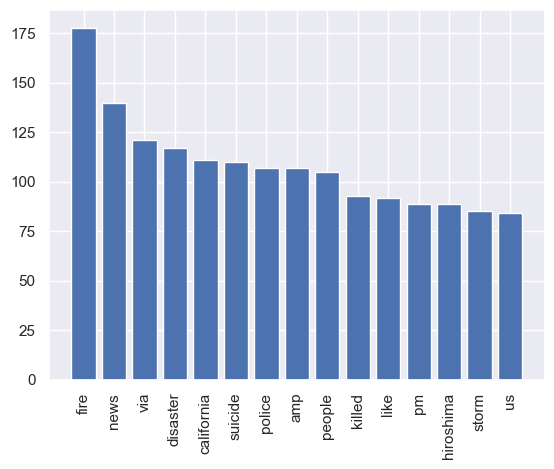

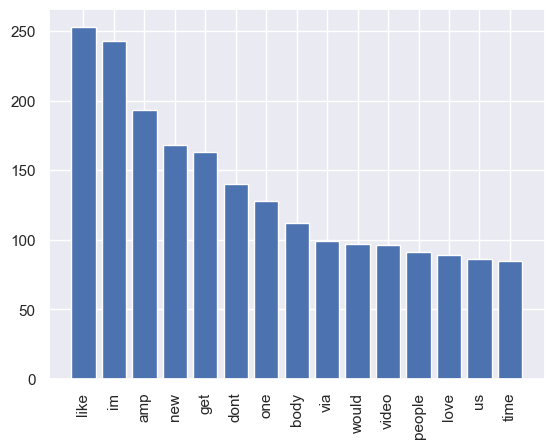

In [11]:
from collections import Counter
import matplotlib.pyplot as plt


positive_disaster = dataframe[dataframe['target'] == 1]
positive_disaster.index = range(len(positive_disaster))
negative_disaster = dataframe[dataframe['target'] == 0]
negative_disaster.index = range(len(negative_disaster))

#Conteo de palabras en tweets positivos
positive_disaster_words = []

for i in range(len(positive_disaster)):
    text = positive_disaster['text'][i].split()
    for word in text:
        positive_disaster_words.append(word)

positive_disaster_words_count = Counter(positive_disaster_words)
positive_words = positive_disaster_words_count #Para analisis exploratorio
print(positive_disaster_words_count.most_common(15))

#Conteo de palabras en tweets negativos
negative_disaster_words = []

for i in range(len(negative_disaster)):
    text = negative_disaster['text'][i].split()
    for word in text:
        negative_disaster_words.append(word)

negative_disaster_words_count = Counter(negative_disaster_words)
negative_words = negative_disaster_words_count #Para analisis exploratorio
print(negative_disaster_words_count.most_common(15))

#make histogram of positive disaster words
positive_disaster_words_count = positive_disaster_words_count.most_common(15)
positive_disaster_words_count = dict(positive_disaster_words_count)
plt.bar(positive_disaster_words_count.keys(), positive_disaster_words_count.values())
plt.xticks(rotation=90)
plt.show()

#Make histogram of negative disaster words
negative_disaster_words_count = negative_disaster_words_count.most_common(15)
negative_disaster_words_count = dict(negative_disaster_words_count)
plt.bar(negative_disaster_words_count.keys(), negative_disaster_words_count.values())
plt.xticks(rotation=90)
plt.show()



Bigrams

<AxesSubplot:xlabel='frequency', ylabel='bigram'>

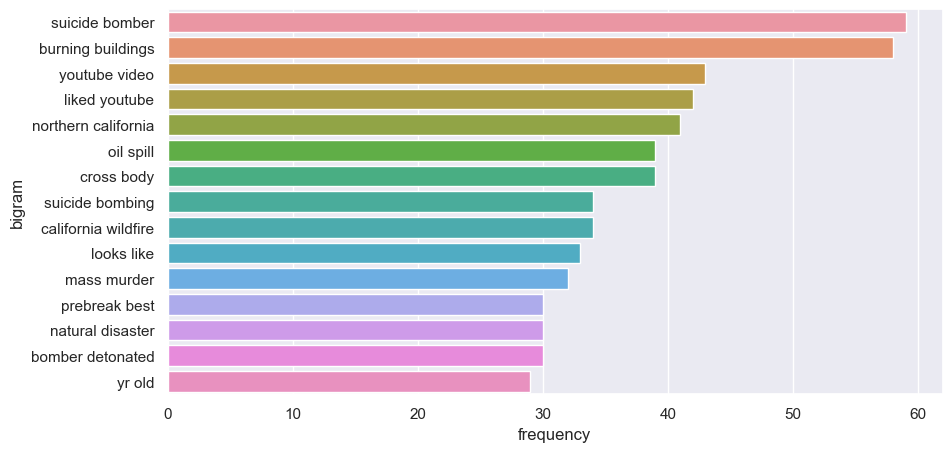

In [12]:
# Referencia: https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5
def get_bigrams(text):
    c_vec = CountVectorizer(ngram_range=(2,2))
    # matrix of ngrams
    ngrams = c_vec.fit_transform(text)
    # count frequency of ngrams
    count_values = ngrams.toarray().sum(axis=0)
    # list of ngrams
    vocab = c_vec.vocabulary_
    df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
                ).rename(columns={0: 'frequency', 1:'bigram'})
    df_ngram.head(10)
    # df_ngram
    return df_ngram
plt.figure(figsize=(10,5))
top_tweets =get_bigrams(dataframe['text'])
top_tweets_bigrams = top_tweets['bigram']
#  get the top 15 bigrams
top_tweet_bigrams=top_tweets_bigrams[:15]
# store the frecuencies in x and the bigrams in y
x=top_tweets['frequency'][:15]
y=top_tweets['bigram'][:15]
sns.barplot(x=x,y=y)

Trigrams

<AxesSubplot:xlabel='frequency', ylabel='trigram'>

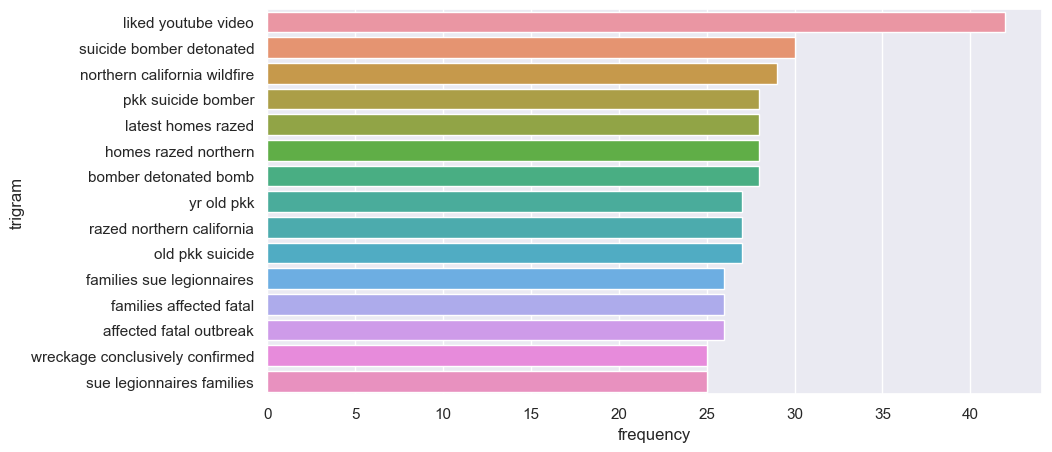

In [13]:
def get_trigrams(text):
    c_vec = CountVectorizer(ngram_range=(3,3))
    # matrix of ngrams
    ngrams = c_vec.fit_transform(text)
    # count frequency of ngrams
    count_values = ngrams.toarray().sum(axis=0)
    # list of ngrams
    vocab = c_vec.vocabulary_
    df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
                ).rename(columns={0: 'frequency', 1:'trigram'})
    df_ngram.head(10)
    return df_ngram
plt.figure(figsize=(10,5))
top_tweets = get_trigrams(dataframe['text'])
top_tweets_trigrams = top_tweets['trigram']
#  get the top 15 trigrams
top_tweet_trigrams=top_tweets_trigrams[:15]
# store the frecuencies in x and the trigrams in y
x=top_tweets['frequency'][:15]
y=top_tweets['trigram'][:15]
sns.barplot(x=x,y=y)

Analisis exploratorio

In [14]:
profile = ProfileReport(dataframe)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
#Palabra que más se repite en tweets positivos
print('Desastre positivo ',positive_words.most_common(1))

#Palabra que más se repite en tweets negativos
print('Desastre negativo ',negative_words.most_common(1))

Desastre positivo  [('fire', 178)]
Desastre negativo  [('like', 253)]


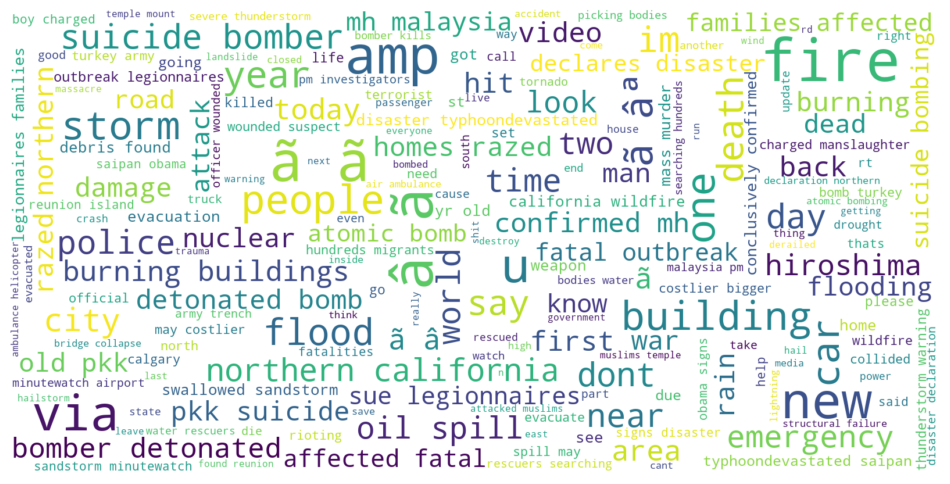

In [16]:
# wordcloud disaster
bad_tweets = dataframe[dataframe['target'] == 1]
disaster_string = list(bad_tweets.text)
disaster_string = "".join(disaster_string)
wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(disaster_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


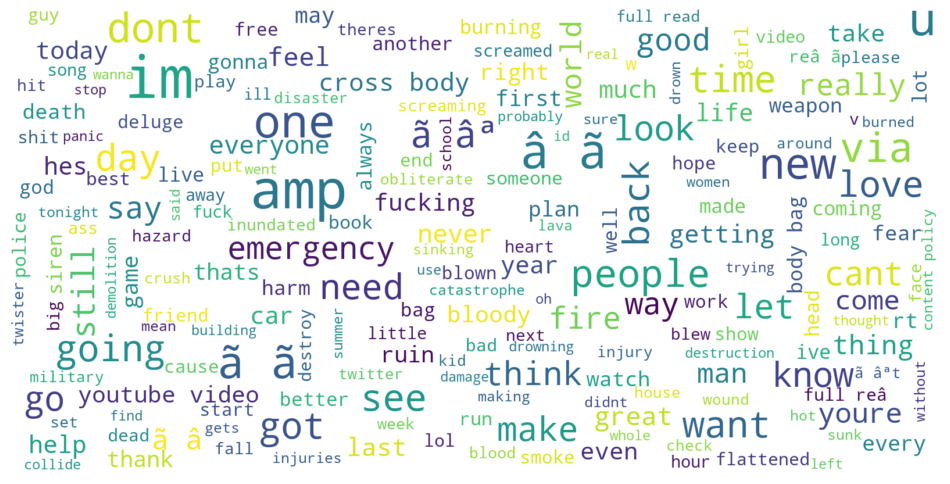

In [17]:
# wordcloud disaster
good_tweets = dataframe[dataframe['target'] == 0]
good_string = list(good_tweets.text)
good_string = "".join(good_string)
wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(good_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
neutral_words = set(positive_disaster_words)&set(negative_disaster_words)
neutral_words = sorted(neutral_words, key = lambda k : positive_disaster_words.index(k))
print(neutral_words[:10])

['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near']


In [19]:
# remove from positive desaster words the ones that are in neutral words
positive_disaster_words = [word for word in positive_disaster_words if word not in neutral_words]
positive_disaster_words_count_clean = Counter(positive_disaster_words)
print(positive_disaster_words_count_clean.most_common(20), '\n')

# remove negative desaster words the ones that are in neutral words
negative_disaster_words = [word for word in negative_disaster_words if word not in neutral_words]
negative_disaster_words_count_clean = Counter(negative_disaster_words)
print(negative_disaster_words_count_clean.most_common(20), '\n')

# count the neutral words
neutral_words_count = Counter(neutral_words)
print(neutral_words_count.most_common(20), '\n')

[('northern', 64), ('legionnaires', 62), ('debris', 50), ('severe', 47), ('derailment', 41), ('migrants', 39), ('investigators', 37), ('mosque', 35), ('pkk', 31), ('detonated', 31), ('israeli', 28), ('turkey', 28), ('helicopter', 25), ('typhoondevastated', 25), ('saipan', 25), ('conclusively', 25), ('projected', 24), ('bestnaijamade', 24), ('signs', 23), ('manslaughter', 23)] 

[('aftershock', 19), ('lmao', 16), ('king', 14), ('career', 13), ('louis', 12), ('edm', 11), ('lucky', 11), ('complete', 11), ('arianagrande', 11), ('shall', 10), ('jeb', 10), ('bitch', 10), ('handbags', 10), ('secrets', 9), ('z', 9), ('welcome', 9), ('fantasy', 9), ('kindle', 9), ('limited', 9), ('hilarious', 9)] 

[('deeds', 1), ('reason', 1), ('earthquake', 1), ('may', 1), ('allah', 1), ('forgive', 1), ('us', 1), ('forest', 1), ('fire', 1), ('near', 1), ('la', 1), ('canada', 1), ('asked', 1), ('place', 1), ('officers', 1), ('evacuation', 1), ('orders', 1), ('expected', 1), ('people', 1), ('california', 1)] 



<AxesSubplot:>

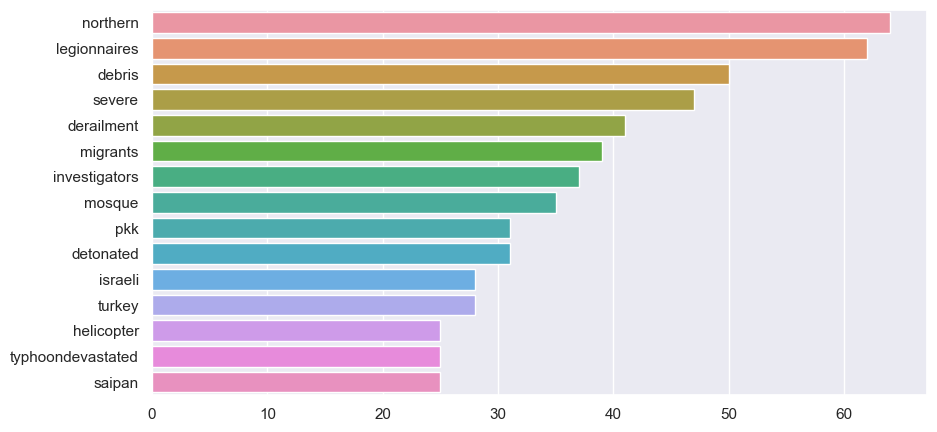

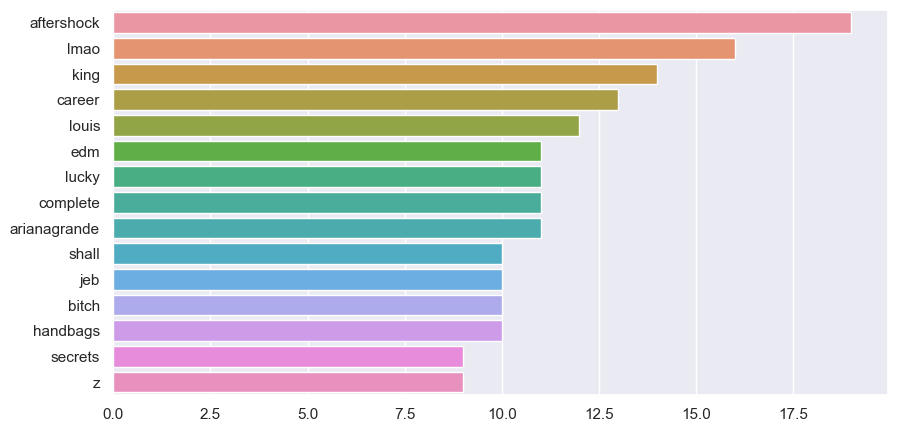

In [20]:
# do a histogram of the positive words
plt.figure(figsize=(10,5))
top_positive_disaster_words = positive_disaster_words_count_clean.most_common(15)
top_positive_disaster_words = dict(top_positive_disaster_words)
x = list(top_positive_disaster_words.values())
y = list(top_positive_disaster_words.keys())
sns.barplot(x=x,y=y)

# do a histogram of the negative words
plt.figure(figsize=(10,5))
top_negative_disaster_words = negative_disaster_words_count_clean.most_common(15)
top_negative_disaster_words = dict(top_negative_disaster_words)
x = list(top_negative_disaster_words.values())
y = list(top_negative_disaster_words.keys())
sns.barplot(x=x,y=y)

Clasificacion de positivos, negativos o neutros

In [25]:
# Referencia: https://akladyous.medium.com/sentiment-analysis-using-vader-c56bcffe6f24
nltk.download('vader_lexicon')
sentimentAnalyzer = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = sentimentAnalyzer.polarity_scores(sentence)
    score = score['compound']
    return score

def set_sentiment(score):
    if score < -0.5:
        return 'negative'
    elif score > 0.5:
        return 'positive'
    else:
        return 'neutral'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ALIEWARE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
# apply the functions to the dataframe
dataframe['score'] = dataframe['text'].apply(sentiment_analyzer_scores)
dataframe['sentiment'] = dataframe['score'].apply(set_sentiment)

# apply the functions to the test
data_test['score'] = data_test['text'].apply(sentiment_analyzer_scores)
data_test['sentiment'] = data_test['score'].apply(set_sentiment)

In [27]:
# los 10 tweets mas negativos
dataframe[dataframe['sentiment'] == 'negative'].sort_values(by='score').head(10)

,id,keyword,location,text,target,score,sentiment
7472,10689,wreck,NaN,wreck wreck wreck wreck wreck wreck wreck wrec...,0,-0.9879,negative
6411,9166,suicide%20bomber,NaN,suicide bomber kills saudi security site mosq...,1,-0.9623,negative
6393,9137,suicide%20bomb,Worldwide,th day since jul nigeria suicide bomb attacks ...,1,-0.9595,negative
6407,9159,suicide%20bomber,Worldwide,killed sâãâªarabia mosque suicide bombing s...,1,-0.9552,negative
472,682,attack,"portland, oregon",illegal alien released obamadhs times charged...,1,-0.9538,negative
1540,2225,chemical%20emergency,"Las Vegas, Nevada",bomb crash loot riot emergency pipe bomb nucle...,1,-0.9524,negative
6930,9940,trouble,NaN,cspan prez mr president biggest terrorist trou...,1,-0.9493,negative
2932,4213,drowned,Pembroke NH,lake sees dead fish poor little guy wonder hap...,0,-0.9477,negative
6818,9765,trapped,10 Steps Ahead. Cloud 9,bomb head explosive decisions dat produced dea...,1,-0.9451,negative
4547,6464,injured,Mumbai,udhampur terror attack militants attack police...,1,-0.9451,negative
